### Notebook for the manual annotation of cell states for all skin

- **Developed by:** Anna Maguza
- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**
- **Date:** 27th of December 2023

### Import required modules

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import anndata as ad

### Set up working environment

In [2]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.9.2
scanpy      1.9.5
-----
PIL                         10.0.1
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.13.0
backcall                    0.2.0
certifi                     2023.07.22
cffi                        1.16.0
charset_normalizer          3.3.0
colorama                    0.4.6
comm                        0.1.4
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
executing                   2.0.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.9.0
idna                        3.4
igraph                      0.11.2
ipykernel                   6.25.2
ipywidgets                  8.1.1
isoduration                 NA
jedi   

### Read in Human skin dataset

In [3]:
adata= sc.read_h5ad('data_skin/SCC0120_1_Skin_scANVI_leiden_Anna.h5ad') 
adata

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition', 'cell_type', 'leiden'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC0120_1_skin', 'mt-SCC0120_1_skin', 'ribo-SCC0120_1_skin', 'n_cells_by_counts-SCC0120_1_skin', 'mean_counts-SCC0120_1_skin', 'pct_dropout_by_counts-SCC0

### Visualize the manifold

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/pl

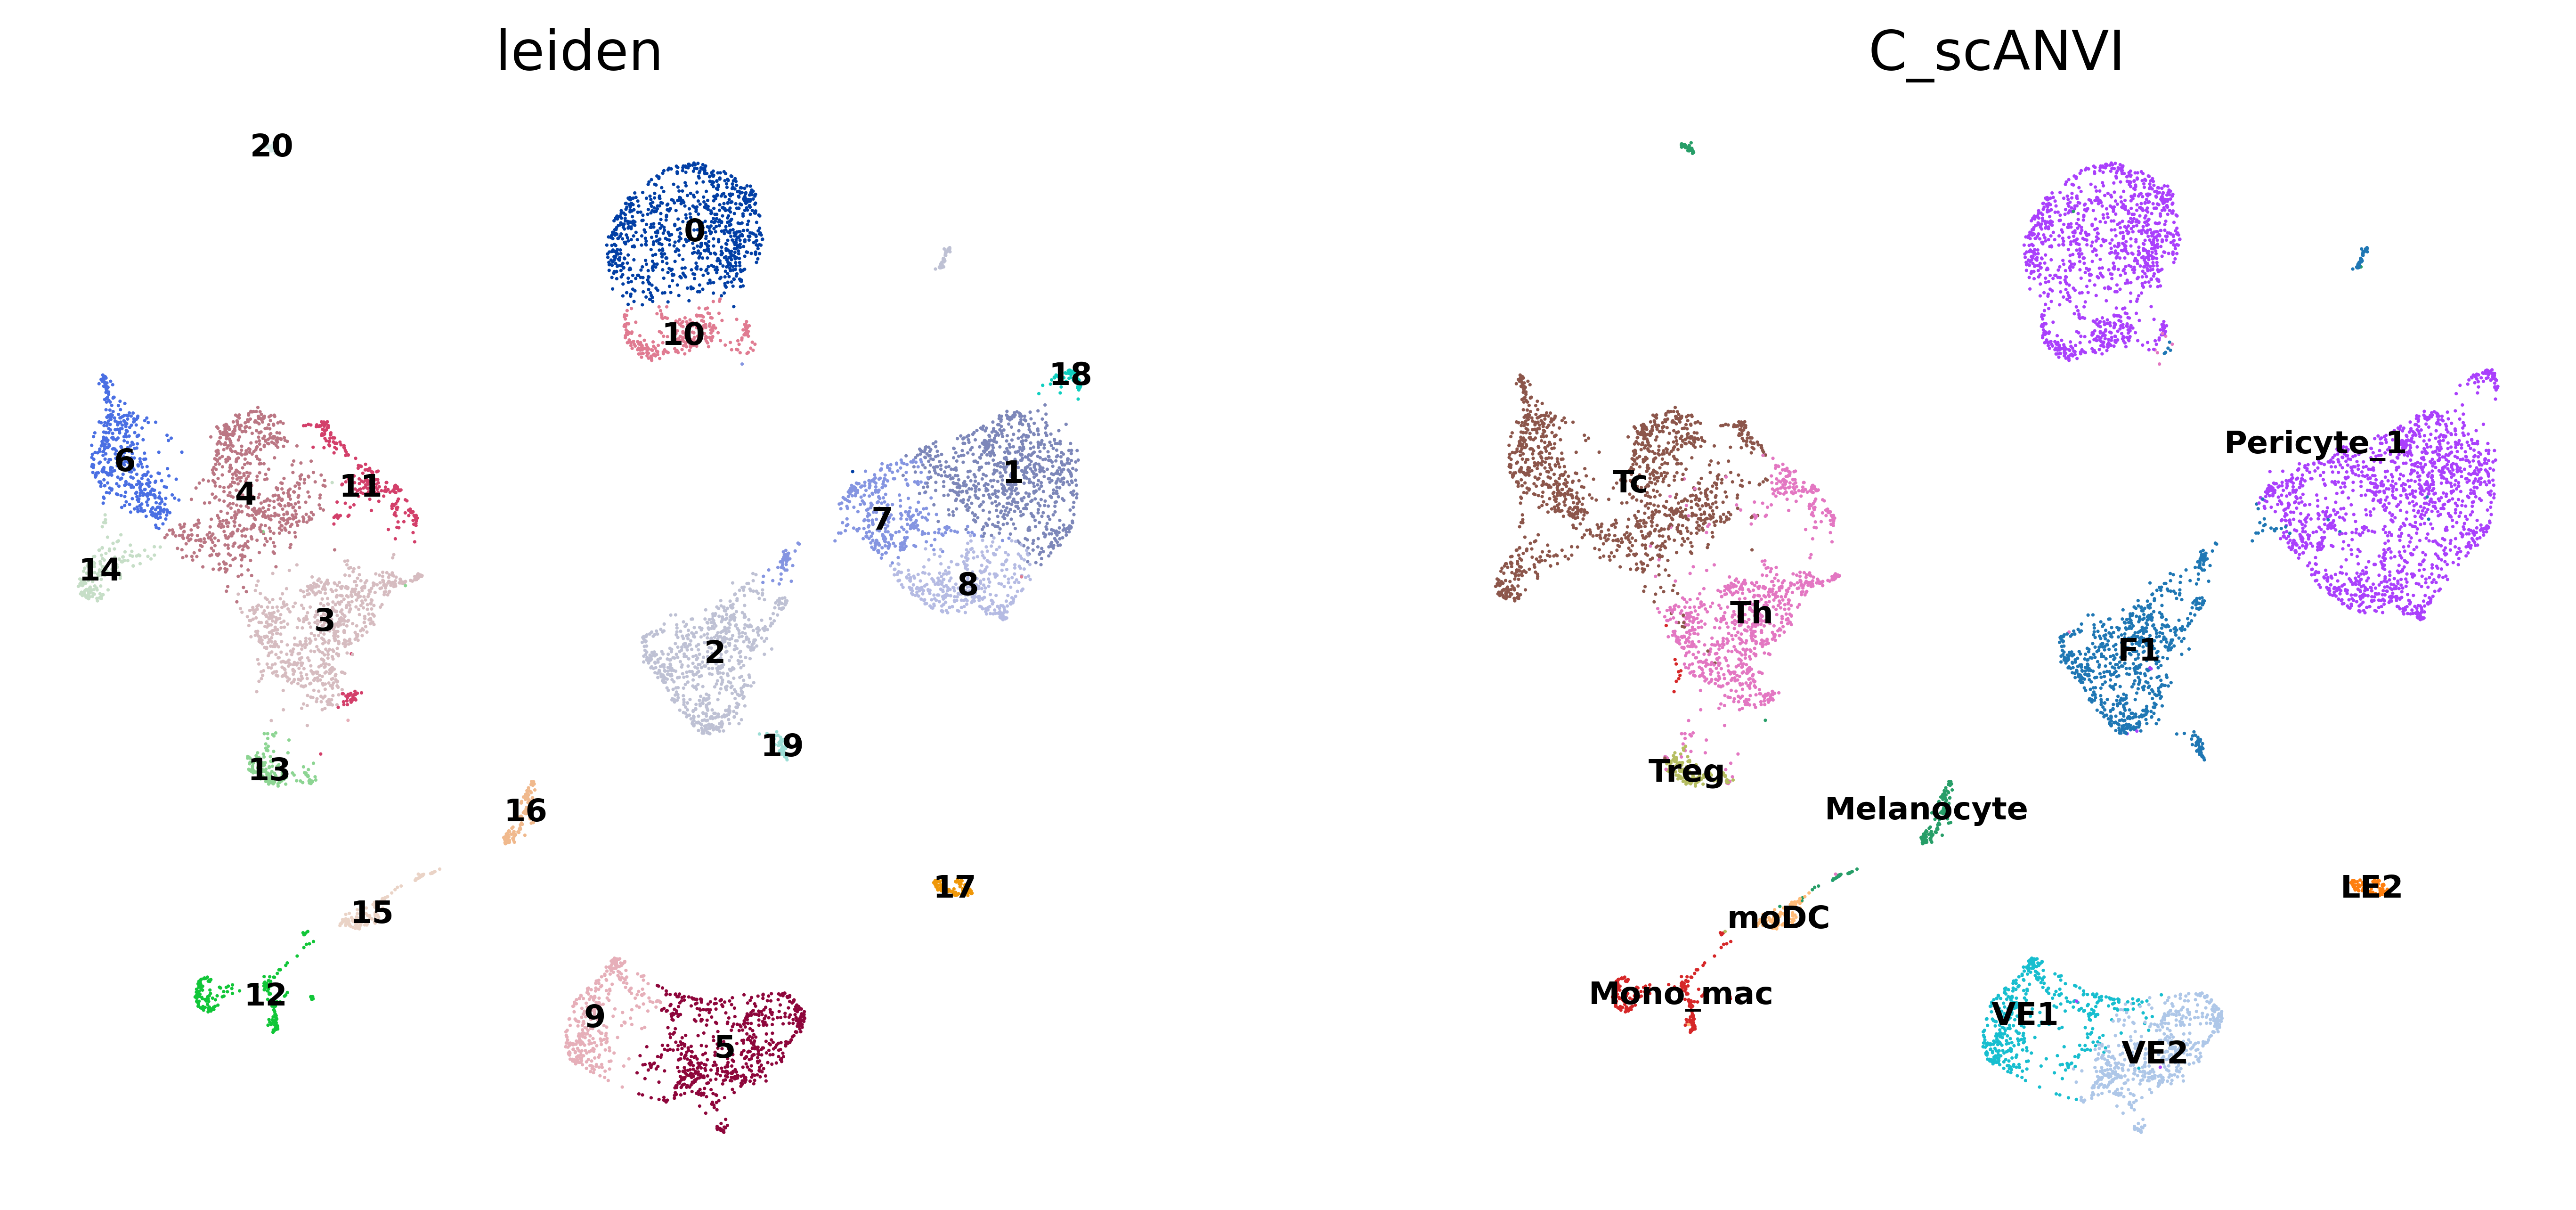

In [4]:
sc.set_figure_params(dpi=300, figsize=(5, 5))
sc.pl.umap(adata, frameon = False, color = ['leiden', 'C_scANVI'], size = 3, legend_fontsize = 8, ncols = 3, legend_loc = 'on data')

### Preprocess dataset for marker genes visualization

* Normalize and log transform

In [5]:
adata_log = ad.AnnData(X = adata.X,  var = adata.var, obs = adata.obs, obsm = adata.obsm)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)
adata_log.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(adata_log, inplace = False)["X"]
)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)


* Identify differentially expressed genes

In [6]:
sc.tl.rank_genes_groups(adata_log, groupby="leiden", method="wilcoxon", n_genes = 100)
df = sc.get.rank_genes_groups_df(adata_log, group=None)

ranking genes


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_grou

* Save DEGs

In [7]:
df.to_csv('data_skin/SCC0120_1_Skin_leiden_DEG.csv')

* Create a column to store annotations

In [6]:
adata_log.obs['predicted_cell_states'] = adata.obs['leiden'].copy()

### Visualize marker genes expression

## Epithelial Cells

* Keratinocytes

In [8]:
keratinocyte_genes = ['KRT1', 'KRT5', 'KRT14', 'KRT15', 'ALDH2', 'ATP1B1', 'CD44', 'TFRC', 'DEFB1', 
                      'FASN', 'GJB2', 'ITGA6', 'KRT10', 'KRT19', 'KRT8', 
                      'KRT2', 'UBE2C']

In [9]:
sc.tl.score_genes(adata_log, keratinocyte_genes, score_name = 'keratinocytes_cells_score')

computing score 'keratinocytes_cells_score'
    finished: added
    'keratinocytes_cells_score', score of gene set (adata.obs).
    650 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['KRT1', 'KRT5', 'KRT14', 'KRT15', 'ALDH2', 'ATP1B1', 'CD44', 'TFRC', 'DEFB1', 
                      'FASN', 'GJB2', 'ITGA6', 'ITGB1', 'KRT10', 'KRT19', 'KRT8', 
                      'KRT2', 'SPRR2A', 'UBE2C', 'keratinocytes_cells_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [10]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Keratinocytes'])

adata_log.obs['predicted_cell_states'][adata_log.obs['keratinocytes_cells_score'] > 1] = 'Keratinocytes'

In [ ]:
adata_log.obs['keratinocytes'] = adata_log.obs['predicted_cell_states'] == 'Keratinocytes'
adata_log.obs['keratinocytes'] = adata_log.obs['keratinocytes'].astype(str)
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['leiden', 'C_scANVI', 'keratinocytes', 'keratinocytes_cells_score'], size = 5, legend_fontsize = 5, ncols = 4, color_map='magma_r')
del adata_log.obs['keratinocytes']

* Stem cells markers

In [11]:
stem_cells_genes = ['LGR5', 'LGR6', 'LRIG1', 'ABCB5', 'PRDM1', 'MYC', 
                    'CD200', 'CD34', 'ITGA6', 'THY1', 
                    'EZH2', 'GLI1', 'LHX2', 'NFATC1', 'TP63', 'POU5F1',
                    'PLET1', 'PROCR', 'SLAMF6', 'SOX2', 'SOX9', 'TCF7']

In [12]:
sc.tl.score_genes(adata_log, stem_cells_genes, score_name = 'stem_cells_score')

computing score 'stem_cells_score'
    finished: added
    'stem_cells_score', score of gene set (adata.obs).
    550 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['LGR5', 'LGR6', 'KRT15', 'LRIG1', 'ABCB5', 'CTNNB1', 'PRDM1', 'MYC', 
                    'CD200', 'ITGB1', 'CD34', 'CD44', 'ITGA6', 'THY1', 'KRT19', 
                    'EZH2', 'FOS', 'GLI1', 'LHX2', 'NFATC1', 'TP63', 'POU5F1',
                    'PLET1', 'PROCR', 'SLAMF6', 'SOX2', 'SOX9', 'TCF7', 'stem_cells_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [13]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Stem_cells'])

adata_log.obs['predicted_cell_states'][adata_log.obs['stem_cells_score'] > 1] = 'Stem_cells'

In [ ]:
adata_log.obs['Stem_cells'] = adata_log.obs['predicted_cell_states'] == 'Stem_cells'
adata_log.obs['Stem_cells'] = adata_log.obs['Stem_cells'].astype(str)
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['leiden', 'C_scANVI', 'Stem_cells', 'stem_cells_score'], size = 5, legend_fontsize = 5, ncols = 4, color_map='magma_r')
del adata_log.obs['Stem_cells']

* Melanocytes markers

In [14]:
melanocytes_genes = ['MLANA', 'PMEL', 'DCT', 'MITF', 'APOD', 'ATP1B1', 'KIT',
                     'ME1', 'ME2', 'PHLDA1', 'S100A1', 'SOX10', 'TYR', 
                     'TYRP1', 'DCT']

In [15]:
sc.tl.score_genes(adata_log, melanocytes_genes, score_name = 'melanocytes_score')

computing score 'melanocytes_score'
    finished: added
    'melanocytes_score', score of gene set (adata.obs).
    550 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['MLANA', 'PMEL', 'DCT', 'MITF', 'APOD', 'ATP1B1', 'KIT',
                     'ME1', 'ME2', 'CD63', 'PHLDA1', 'S100A1', 'SOX10', 'TYR', 
                     'TYRP1', 'DCT', 'melanocytes_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [16]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Melanocytes'])

In [17]:
adata_log.obs.loc[(adata_log.obs['leiden'] == '20'), 'predicted_cell_states'] = 'Melanocytes'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['20'])

## Neuronal Cells

In [18]:
neuronal_genes = ['NRXN1', 'SCN7A', 'ANK3']
sc.tl.score_genes(adata_log, neuronal_genes, score_name = 'neuronal_score')

computing score 'neuronal_score'
    finished: added
    'neuronal_score', score of gene set (adata.obs).
    149 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['NRXN1', 'SCN7A', 'ANK3', 'neuronal_score', 'leiden'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [19]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Neuronal'])

adata_log.obs.loc[(adata_log.obs['leiden'] == '16'), 'predicted_cell_states'] = 'Neuronal'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['16'])

## Mesenchymal Cells

* Vascular endothelium

In [20]:
ve_genes = ['PECAM1', 'EMCN', 'CDH5', 'VWF', 'KDR', 'FLT1', 'TEK', 'CLDN5']

In [21]:
sc.tl.score_genes(adata_log, ve_genes, score_name = 've_score')

computing score 've_score'
    finished: added
    've_score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['PECAM1', 'EMCN', 'CDH5', 'VWF', 'KDR', 'FLT1', 'TEK', 'CLDN5', 've_score', 'leiden'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [22]:
artery_genes = ['GJA4', 'GJA5', 'HEY1', 'GATA2', 'CXCR4', 'SOX17', 'MECOM']
sc.tl.score_genes(adata_log, artery_genes, score_name = 'artery_score')

vein_genes = ['ACKR1', 'NR2F2', 'PLVAP']
sc.tl.score_genes(adata_log, vein_genes, score_name = 'vein_score')

computing score 'artery_score'


    finished: added
    'artery_score', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)
computing score 'vein_score'


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated 

    finished: added
    'vein_score', score of gene set (adata.obs).
    149 total control genes are used. (0:00:00)


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['GJA4', 'GJA5', 'HEY1', 'GATA2', 'CXCR4', 'SOX17', 'MECOM', 'artery_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['ACKR1', 'NR2F2', 'PLVAP', 'vein_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [20]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Artery_VE', 'Vein_VE'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '9'), 'predicted_cell_states'] = 'Artery_VE'
adata_log.obs.loc[(adata_log.obs['leiden'] == '5'), 'predicted_cell_states'] = 'Vein_VE'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['9', '5'])

* Lymphatic endothelium genes

In [21]:
le_genes = ['LYVE1', 'PDPN']

In [26]:
sc.tl.score_genes(adata_log, le_genes, score_name = 'le_score')

computing score 'le_score'
    finished: added
    'le_score', score of gene set (adata.obs).
    100 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['LYVE1', 'PDPN', 'le_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [22]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['LE'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '17'), 'predicted_cell_states'] = 'LE'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['17'])

* Fibroblasts

In [23]:
fibroblasts_genes = ['MMP2', 'COL1A1', 'COL1A2', 'NT5E', 'COL6A1']

In [24]:
sc.tl.score_genes(adata_log, fibroblasts_genes, score_name = 'fibroblasts_score')

computing score 'fibroblasts_score'
    finished: added
    'fibroblasts_score', score of gene set (adata.obs).
    150 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['MMP2', 'COL1A1', 'COL1A2', 'NT5E', 'COL6A1', 'fibroblasts_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

* Mesenchymal Stem Cells

Reference 1: CD105+, CD90+, CD73+, CD45−, CD34−, CD19−, HLA-DRA−, and CD11b− (Fan, 2022)

In [ ]:
MSCs_genes1 = ['ENG', 'THY1', 'NT5E']
sc.tl.score_genes(adata_log, MSCs_genes1, score_name = 'MSCs_score1')

sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['ENG', 'THY1', 'NT5E', 'MSCs_score1', 'PTPRC', 'CD34', 'HLA-DRA', 'ITGAM'], size = 5, legend_fontsize = 5, ncols = 4, color_map='magma_r')


Reference 2: CCL13, NGFR, TFP2A, TBX5, IGF1, TMEM176A/B (Wang, 2021)

In [ ]:
MSCs_genes2 = ['CCL13', 'NGFR', 'TFAP2A', 'TBX5', 'IGF1', 'TMEM176A', 'TMEM176B']
sc.tl.score_genes(adata_log, MSCs_genes2, score_name = 'MSCs_score2')

sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['CCL13', 'NGFR', 'TFAP2A', 'TBX5', 'IGF1', 'TMEM176A', 'TMEM176B', 'MSCs_score2'], size = 5, legend_fontsize = 5, ncols = 4, color_map='magma_r')

Reference 3: CD44+, CD73+, CD90+, CD105+, CD166+, SSEA-4+, Vimentin+, CD34-, CD45-, HLA-DR- (Ullah, 2015)

In [ ]:
MSCs_genes3 = ['CD44', 'NT5E', 'THY1', 'ENG', 'ALCAM', 'POU5F1']
sc.tl.score_genes(adata_log, MSCs_genes3, score_name = 'MSCs_score3')

sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['CD44', 'NT5E', 'THY1', 'ENG', 'ALCAM', 'POU5F1', 'MSCs_score3', 'CD34', 'PTPRC', 'HLA-DRA'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

Reference 4: SOX2, ACTA2, CSPG1 (ACAN), CD200, ITGA8 and PDGFRA, CD34, SCA1 (ATXN1), HIC1, DPP4/CD26, DPT, EN1 (recommended by Samantha Morris)

In [ ]:
MSCs_genes4 = ['SOX2', 'ACTA2', 'ACAN', 'CD200', 'ITGA8', 'PDGFRA', 'CD34', 'ATXN1', 'HIC1', 'DPP4', 'DPT', 'EN1']
sc.tl.score_genes(adata_log, MSCs_genes4, score_name = 'MSCs_score4')

sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['SOX2', 'ACTA2', 'ACAN', 'CD200', 'ITGA8', 'PDGFRA', 'CD34', 'ATXN1', 'HIC1', 'DPP4', 'DPT', 'EN1', 'MSCs_score4'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [28]:
adata_log

AnnData object with n_obs × n_vars = 7479 × 27449
    obs: 'sample_id', 'Status', 'Site', 'Tissue', 'Location', 'donor_id', 'Sex', 'full_clustering', 'donor', 'cell_states', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_HTO', 'nFeature_HTO', 'nCount_CITE', 'nFeature_CITE', 'nCount_PROT', 'nFeature_PROT', 'percent.mt', 'sample', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'HTO_classification.global', 'hash.ID', 'tissue', 'condition', 'n_genes', 'doublet_scores', 'hashtag', 'unique', 'group', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'skin_condition', 'cell_type', 'leiden', 'predicted_cell_states', 'keratinocytes_cells_score', 'stem_cells_score', 'melanocytes_score', 'neuronal_score', 'fibroblasts_score', 'MSCs_score4'
    var: 'gene_ids-SCC0120_1_skin', 'feature_types-SCC01

In [29]:
umap_coordinates = adata.obsm['X_umap']
leiden_clusters = adata.obs['leiden']
cluster_17_cells = adata[leiden_clusters == '17']
umap_coordinates_cluster_17 = umap_coordinates[adata.obs_names.isin(cluster_17_cells.obs_names)]


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [30]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Fibroblasts_PRR16+', 'Fibroblasts_ITGA6+', 'MSCs_like'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '2'), 'predicted_cell_states'] = 'Fibroblasts_PRR16+'
adata_log.obs.loc[(adata_log.obs['leiden'] == '19'), 'predicted_cell_states'] = 'Fibroblasts_ITGA6+'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['2', '19'])

In [31]:
#Step 1: Access UMAP coordinates and Leiden cluster assignments
umap_coordinates = adata_log.obsm['X_umap']
leiden_clusters = adata_log.obs['leiden']

# Step 2: Identify cells in cluster 2
cluster_2_cells = adata_log[leiden_clusters == '2']

# Step 3: Identify cells in cluster 2 and located further than 25 on x-coordinate
threshold = 25
cluster_2_filtered_cells_mask = umap_coordinates[adata_log.obs_names.isin(cluster_2_cells.obs_names), 0] > threshold
cluster_2_filtered_cells = cluster_2_cells[cluster_2_filtered_cells_mask]

# Step 4: Rename the clusters in 'predicted_cell_states' column
adata_log.obs.loc[cluster_2_filtered_cells.obs_names, 'predicted_cell_states'] = 'MSCs_like'

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [32]:
adata_log.obs['predicted_cell_states'].value_counts()

predicted_cell_states
0                     861
1                     789
3                     703
Fibroblasts_PRR16+    689
4                     646
Vein_VE               641
6                     433
7                     378
8                     358
Artery_VE             339
10                    265
11                    246
12                    214
14                    149
13                    149
Neuronal              127
15                    102
LE                     91
18                     60
Keratinocytes          53
Stem_cells             50
Fibroblasts_ITGA6+     46
MSCs_like              45
Melanocytes            45
Name: count, dtype: int64

* Adventitial fibroblasts

Reference 1: Vimentin, collagen type-1, CD29, CD44, and CD105 (Hoshino 2008)

In [ ]:
adv_fibroblasts_genes = ['VIM', 'COL1A1', 'ITGB1', 'CD44', 'ENG']
sc.tl.score_genes(adata_log, adv_fibroblasts_genes, score_name = 'adv_fibroblasts_score1')

sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['VIM', 'COL1A1', 'ITGB1', 'CD44', 'ENG', 'adv_fibroblasts_score1'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

Reference 2: Collagen type-1, Enolase 2, Fibroblast specific protein 1, Gli1, PDGFRα, Patched-1 and patched-2, Sca1, and Tcf21 (Kuwabara 2017)

In [ ]:
adv_fibroblasts_genes2 = ['COL1A1', 'ENO2', 'AIFM2', 'S100A4', 'GLI1', 'PTCH1', 'PTCH2', 'PDGFRA', 'ATXN1', 'TCF21']
sc.tl.score_genes(adata_log, adv_fibroblasts_genes2, score_name = 'adv_fibroblasts_score2')

sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['COL1A1', 'ENO2', 'AIFM2', 'S100A4', 'GLI1', 'PTCH1', 'PTCH2', 'PDGFRA', 'ATXN1', 'TCF21', 'adv_fibroblasts_score2'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [46]:
adata_log.obs['predicted_cell_states'].value_counts()

predicted_cell_states
vSMCs_NME+            862
1                     789
3                     703
Fibroblasts_PRR16+    689
4                     646
Vein_VE               641
6                     433
7                     378
8                     358
Artery_VE             339
vSMCs_NME-            265
11                    246
12                    214
14                    149
13                    149
Neuronal              127
15                    102
LE                     91
18                     60
Keratinocytes          52
Stem_cells             50
Fibroblasts_ITGA6+     46
MSCs_like              45
Melanocytes            45
Name: count, dtype: int64

In [47]:
# Extract MSCs_like cells as a separate AnnData object and save it to a file
MSCs_like_cells = adata_log[adata_log.obs['predicted_cell_states'] == 'MSCs_like']
MSCs_like_cells.write_h5ad('data_skin/MSCs_like_cells.h5ad')

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


* Vascular Smooth Muscle Cells

In [43]:
VSMC_genes = ['ACTA2', 'TAGLN', 'MYH11', 'PDGFRB', 'CNN1', 'TAGLN2', 'MYL9', 'RGS5', 'MYLK', 'HHIP', 'GJA4', 'NOX4']
sc.tl.score_genes(adata_log, VSMC_genes, score_name = 'vsmc_score')

computing score 'vsmc_score'
    finished: added
    'vsmc_score', score of gene set (adata.obs).
    400 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['ACTA2', 'TAGLN', 'MYH11', 'PDGFRB', 'CNN1', 'TAGLN2', 'MYL9', 'RGS5', 'MYLK', 'HHIP', 'GJA4', 'NOX4', 'vsmc_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

* Compare vSMCs in leiden 0 to vSMCs in leiden 10

ranking genes


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


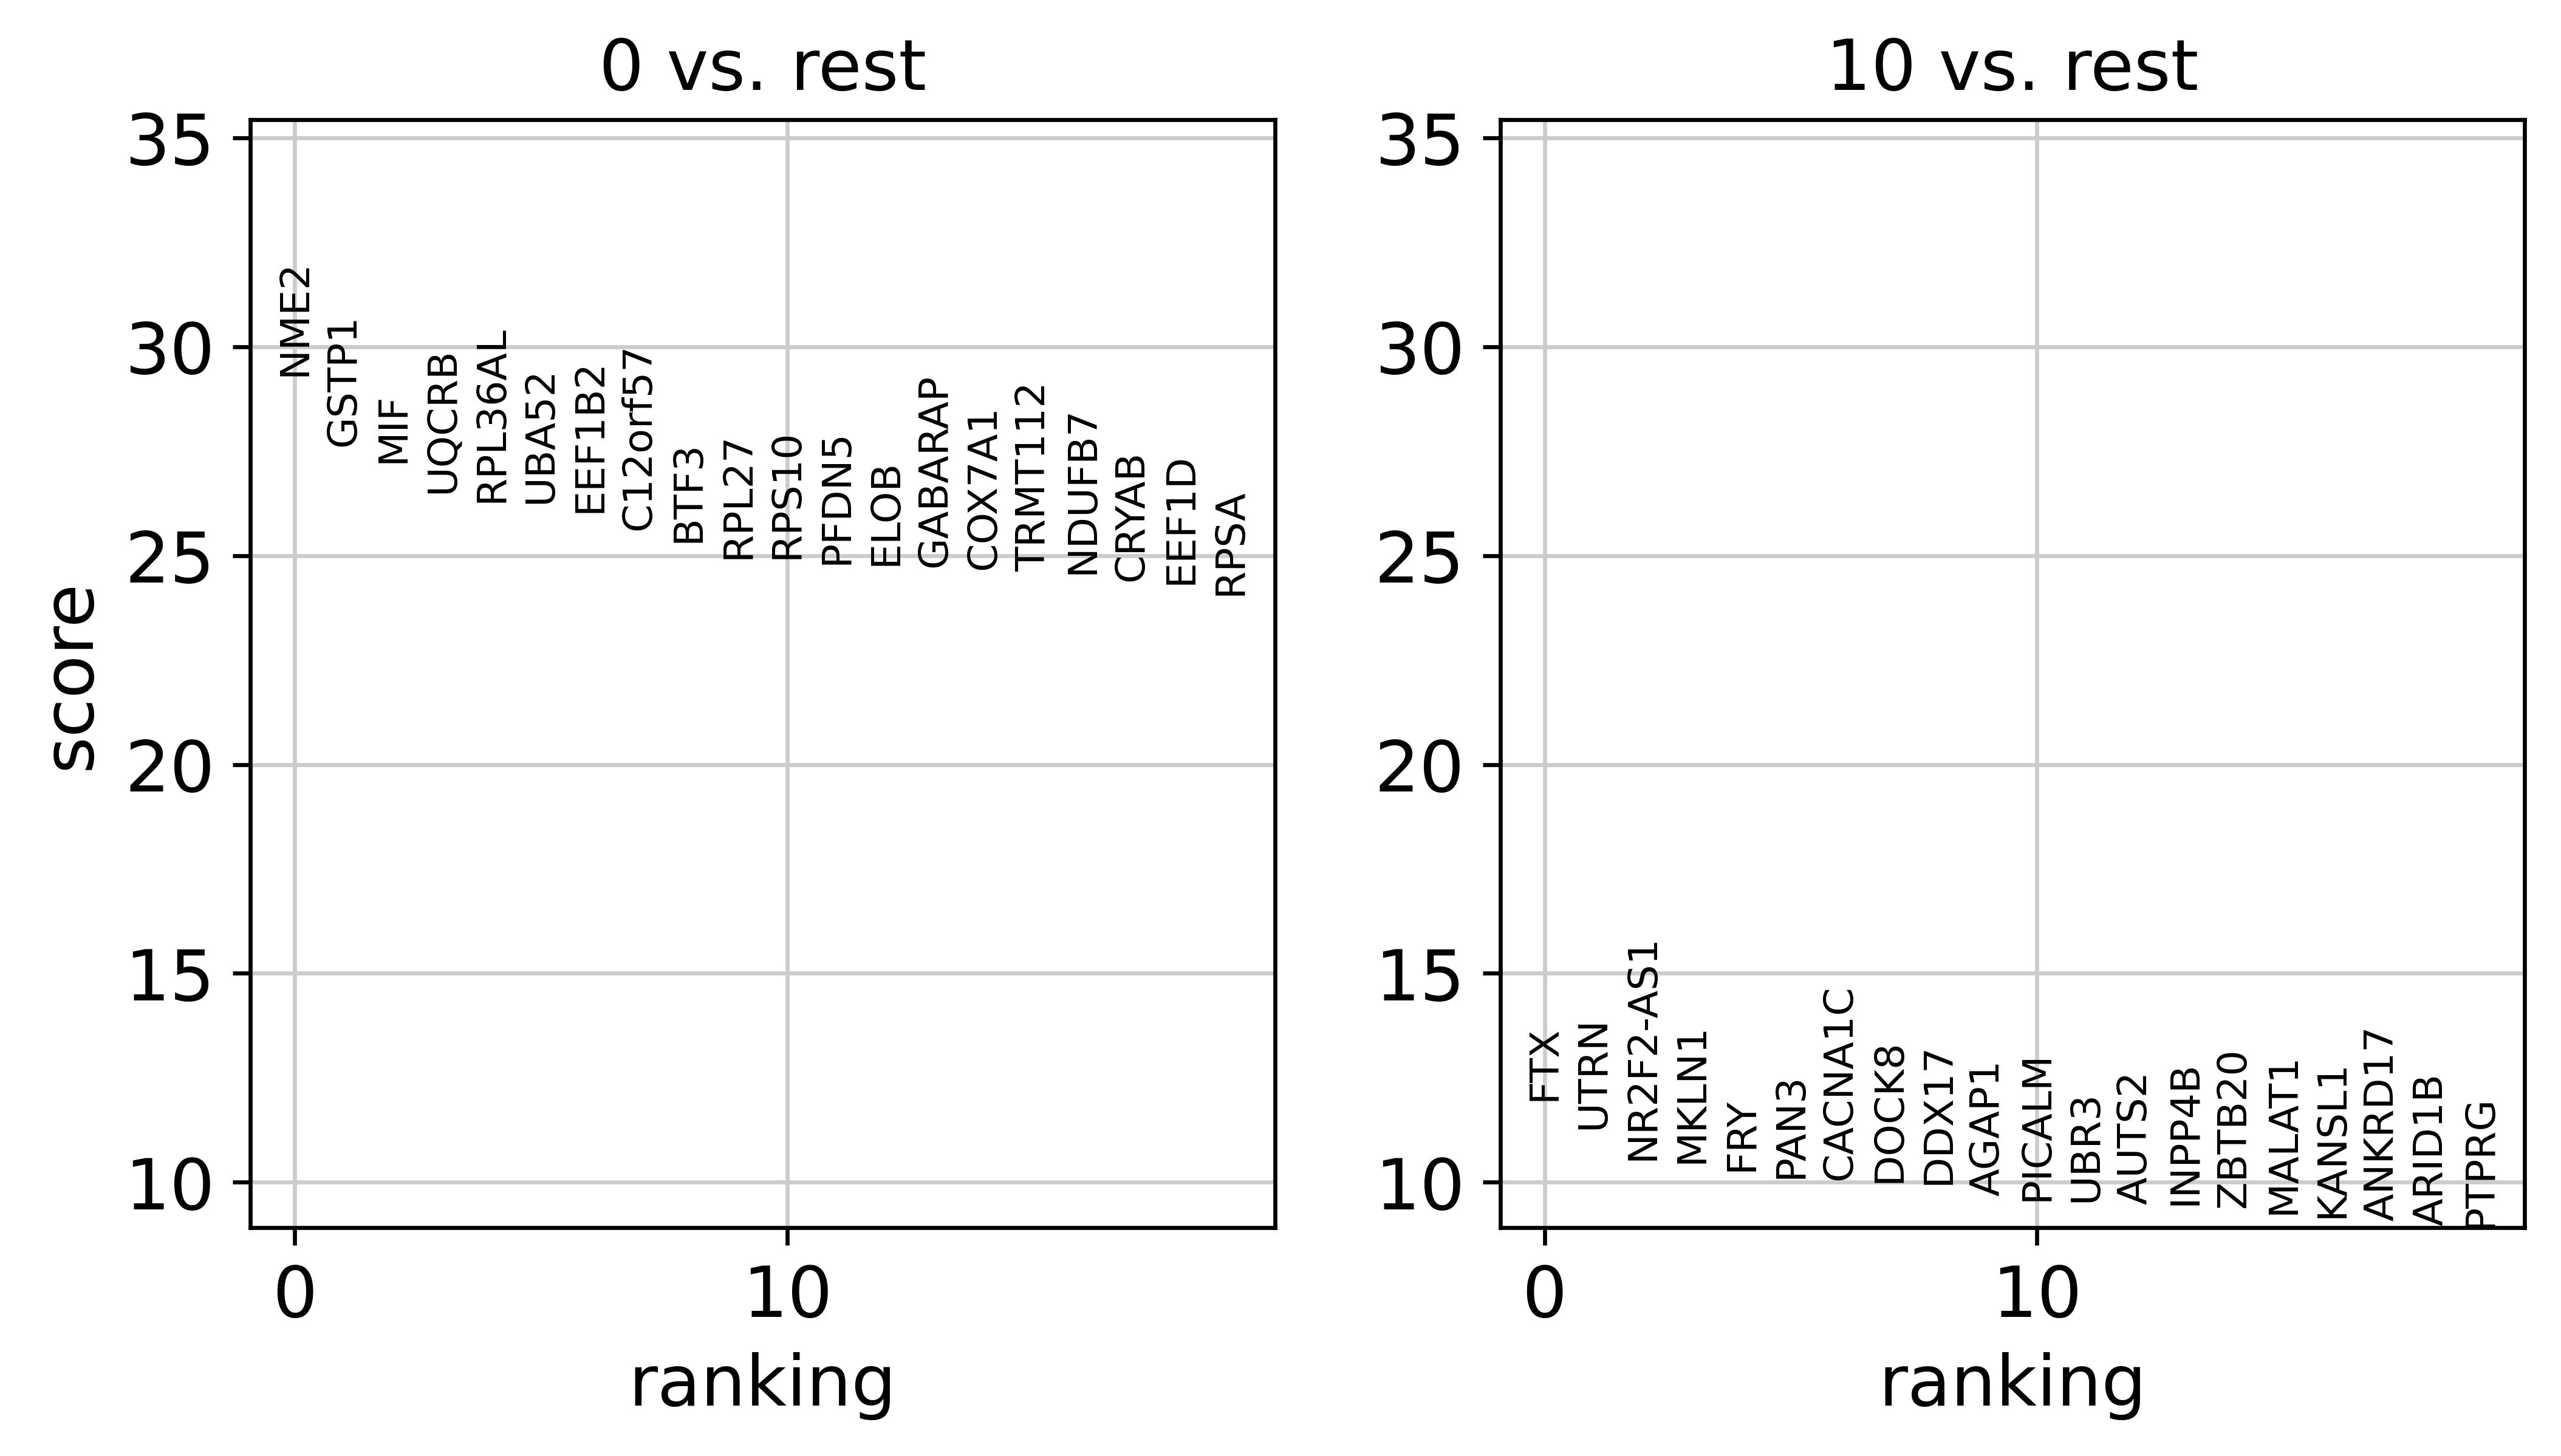

In [34]:
# Specify the two clusters you want to compare
cluster_0 = '0'
cluster_10 = '10'

# Filter the data to include only the cells from the specified clusters
adata_filtered = adata_log[(adata_log.obs['leiden'] == cluster_0) | (adata_log.obs['leiden'] == cluster_10)].copy()

# Perform the differential gene expression analysis for cluster 2 vs cluster 19 on the filtered data
sc.tl.rank_genes_groups(adata_filtered, groupby='leiden', groups=[cluster_0, cluster_10])

# Visualize the results for the specific comparison between cluster 2 and cluster 19
sc.pl.rank_genes_groups(adata_filtered, groupby='leiden', key='rank_genes_groups')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['leiden', 'NME2', 'GSTP1', 'FTX', 'UTRN'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [45]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['vSMCs_NME+', 'vSMCs_NME-'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '0'), 'predicted_cell_states'] = 'vSMCs_NME+'
adata_log.obs.loc[(adata_log.obs['leiden'] == '10'), 'predicted_cell_states'] = 'vSMCs_NME-'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['0', '10'])

* Pericytes

In [ ]:
vSC = ['ANPEP', 'NT5E', 'THY1', 'ITGB1', 'CD44', 'ENG']
sc.tl.score_genes(adata_log, vSC, score_name = 'vSC_score')

sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['ANPEP', 'NT5E', 'THY1', 'ITGB1', 'CD44', 'ENG', 'vSC_score'], size = 5, legend_fontsize = 5, ncols = 3, color_map='magma_r')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['CIDEA', 'PRDM16', 'ZIC1', 'LHX8', 'EVA1A', 'EPSTI1'], size = 5, legend_fontsize = 5, ncols = 3, color_map='magma_r')

In [40]:
EPCs = ['BMP2', 'BMP4', 'EFNB2', 'NRP1', 'VEGFC', 'NOTCH1', 'PECAM1']

sc.tl.score_genes(adata_log, EPCs, score_name = 'EPCs_score')

computing score 'EPCs_score'
    finished: added
    'EPCs_score', score of gene set (adata.obs).
    300 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['BMP2', 'BMP4', 'EFNB2', 'NRP1', 'VEGFC', 'NOTCH1', 'PECAM1', 'EPCs_score'], size = 5, legend_fontsize = 5, ncols = 3, color_map='magma_r')

In [92]:
pericytes_genes = ['KCNJ8', 'ABCC9', 'VTN', 'ANPEP', 'CD248']

sc.tl.score_genes(adata_log, pericytes_genes, score_name = 'pericytes_score')

computing score 'pericytes_score'
    finished: added
    'pericytes_score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['KCNJ8', 'ABCC9', 'VTN', 'ANPEP', 'CD248', 'pericytes_score'], size = 5, legend_fontsize = 5, ncols = 3, color_map='magma_r')

In [ ]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Pericytes_1', 'Pericytes_2'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '0'), 'predicted_cell_states'] = 'Pericytes_1'
adata_log.obs.loc[(adata_log.obs['leiden'] == '10'), 'predicted_cell_states'] = 'Pericytes_1'

adata_log.obs.loc[(adata_log.obs['leiden'] == '1'), 'predicted_cell_states'] = 'Pericytes_2'
adata_log.obs.loc[(adata_log.obs['leiden'] == '7'), 'predicted_cell_states'] = 'Pericytes_2'
adata_log.obs.loc[(adata_log.obs['leiden'] == '8'), 'predicted_cell_states'] = 'Pericytes_2'
adata_log.obs.loc[(adata_log.obs['leiden'] == '18'), 'predicted_cell_states'] = 'Pericytes_2'

In [ ]:
# Specify the two clusters you want to compare
cluster_1 = 'Pericytes_1'
cluster_2 = 'Pericytes_2'

# Filter the data to include only the cells from the specified clusters
adata_filtered = adata_log[(adata_log.obs['predicted_cell_states'] == cluster_1) | (adata_log.obs['predicted_cell_states'] == cluster_2)].copy()

# Perform the differential gene expression analysis for cluster 2 vs cluster 19 on the filtered data
sc.tl.rank_genes_groups(adata_filtered, groupby='predicted_cell_states', groups=[cluster_1, cluster_2])

# Visualize the results for the specific comparison between cluster 2 and cluster 19
sc.pl.rank_genes_groups(adata_filtered, groupby='predicted_cell_states', key='rank_genes_groups')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['leiden', 'NET1', 'RERGL', 'COL6A3', 'ADGRF5'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [ ]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Pericytes_NET1+', 'Pericytes_COL6A3+_ADGRF5+'])
adata_log.obs.loc[(adata_log.obs['predicted_cell_states'] == 'Pericytes_1'), 'predicted_cell_states'] = 'Pericytes_NET1+'
adata_log.obs.loc[(adata_log.obs['predicted_cell_states'] == 'Pericytes_2'), 'predicted_cell_states'] = 'Pericytes_COL6A3+_ADGRF5+'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['Pericytes_2', 'Pericytes_1', '0', '8', '1', '18', '10', '7'])

In [ ]:
adata_log.obs['predicted_cell_states'].value_counts()

+ Compare fibroblasts and mesenchymal clusters between each other

In [7]:
# Specify the two clusters you want to compare
cluster_1 = '1'
cluster_2 = '2'
cluster_7 = '7'
cluster_8 = '8'
cluster_18 = '18'
cluster_19 = '19'

# Filter the data to include only the cells from the specified clusters
adata_filtered = adata_log[(adata_log.obs['leiden'] == cluster_1) | (adata_log.obs['leiden'] == cluster_2) |
                           (adata_log.obs['leiden'] == cluster_7) | (adata_log.obs['leiden'] == cluster_8) |
                           (adata_log.obs['leiden'] == cluster_18) | (adata_log.obs['leiden'] == cluster_19)].copy()

# Perform the differential gene expression analysis for cluster 2 vs cluster 19 on the filtered data
sc.tl.rank_genes_groups(adata_filtered, groupby='leiden')

# Visualize the results for the specific comparison between cluster 2 and cluster 19
sc.pl.rank_genes_groups(adata_filtered, groupby='leiden', key='rank_genes_groups')

ranking genes


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


ranking genes


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


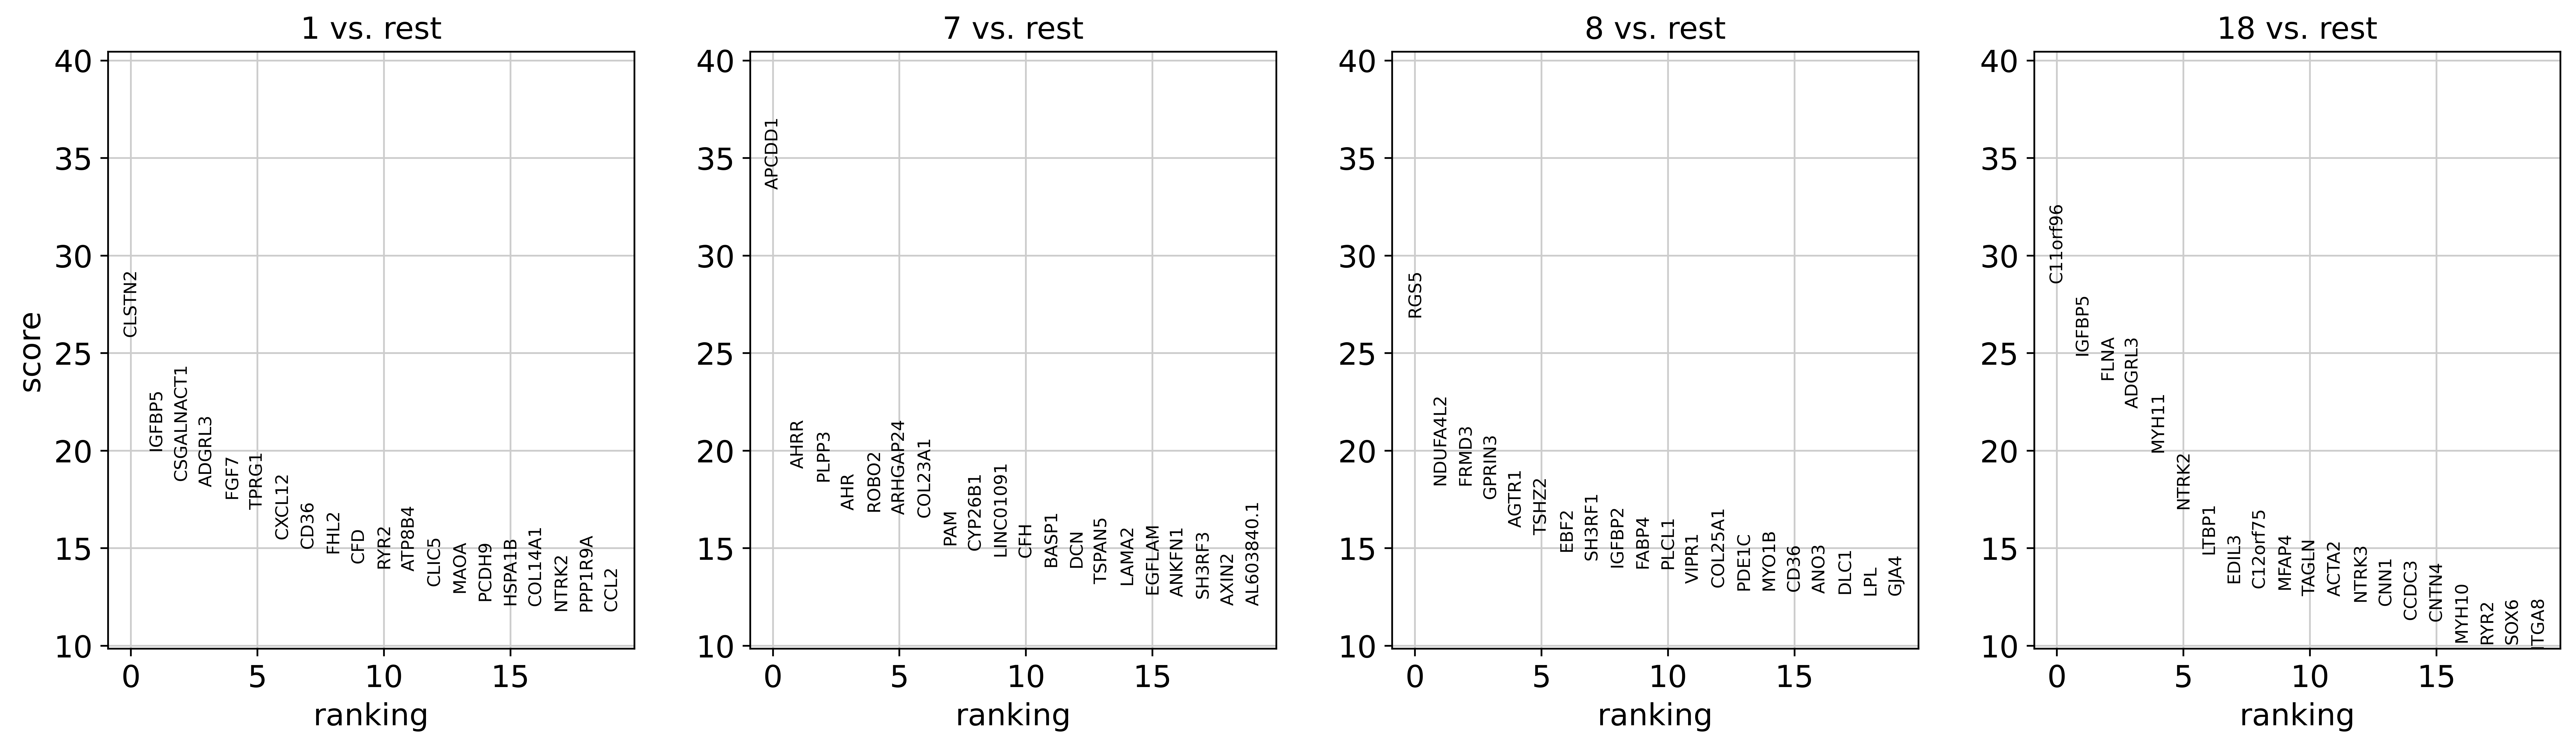

In [8]:
# Filter the data to include only the cells from the specified clusters
adata_filtered = adata_log[(adata_log.obs['leiden'] == cluster_1) | 
                           (adata_log.obs['leiden'] == cluster_7) | (adata_log.obs['leiden'] == cluster_8) |
                           (adata_log.obs['leiden'] == cluster_18) ].copy()

# Perform the differential gene expression analysis for cluster 2 vs cluster 19 on the filtered data
sc.tl.rank_genes_groups(adata_filtered, groupby='leiden')

# Visualize the results for the specific comparison between cluster 2 and cluster 19
sc.pl.rank_genes_groups(adata_filtered, groupby='leiden', key='rank_genes_groups')

* Cytotoxic T cells

In [ ]:
ct_genes = ['CD8A', 'CD8B']
th_genes = ['CD4', 'CD40LG']

sc.tl.score_genes(adata_log, ct_genes, score_name = 'ct_score')
sc.tl.score_genes(adata_log, th_genes, score_name = 'th_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['CD8A', 'CD8B', 'ct_score', 'CD4', 'CD40LG', 'th_score', 'leiden', ], size = 5, legend_fontsize = 5, ncols = 4, color_map='magma_r')

In [ ]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['Tc', 'Th'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '4'), 'predicted_cell_states'] = 'Tc'
adata_log.obs.loc[(adata_log.obs['leiden'] == '3'), 'predicted_cell_states'] = 'Th'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['4', '3'])

In [ ]:
condition = (adata_log.obs['leiden'] == '11') & (adata_log.obs['ct_score'] > 5)
adata_log.obs.loc[condition, 'predicted_cell_states'] = 'Tc'

condition = (adata_log.obs['leiden'] == '11') & (adata_log.obs['th_score'] > 5)
adata_log.obs.loc[condition, 'predicted_cell_states'] = 'Th'

* Natural Killers

In [ ]:
nk_genes = ['GZMB', 'NCAM1', 'NCR1', 'NKG7', 'CCL5', 'CD3D', 
            'CX3CR1', 'FASLG', 'GNLY', 'XCL1', 'XCL2', 'KLRD1', 'GNLY', 'PRF1', 'FCGR3A']

In [ ]:
sc.tl.score_genes(adata_log, nk_genes, score_name = 'nk_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['GZMB', 'CD4', 'NCAM1', 'NCR1', 'NKG7', 'CCL5', 'CD3D', 'CD8A', 
            'CX3CR1', 'FASLG', 'GNLY', 'XCL1', 'XCL2', 'KLRD1', 'GNLY', 'PRF1', 'FCGR3A', 'nk_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [ ]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['NK_cells'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '6'), 'predicted_cell_states'] = 'NK_cells'

adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['6'])

In [ ]:
condition = (adata_log.obs['leiden'] == '4') & (adata_log.obs['nk_score'] > 4)

adata_log.obs.loc[condition, 'predicted_cell_states'] = 'NK_cells'

* T-regulatory

In [ ]:
t_reg = ['FOXP3', 'TIGIT', 'CTLA4']

In [ ]:
sc.tl.score_genes(adata_log, t_reg, score_name = 't_reg_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['FOXP3', 'TIGIT', 'CTLA4', 't_reg_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [ ]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['T_reg'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '13'), 'predicted_cell_states'] = 'T_reg'
#adata_log.obs.loc[(adata_log.obs['leiden'] == '13' & adata_log.obs['leiden'] != 'Stem_cells'), 'predicted_cell_states'] = 'T_reg'
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['13'])

In [ ]:
adata_log.obs['predicted_cell_states'].value_counts()

* ILC

In [ ]:
ilc_genes = ['S100A13', 'TLE1', 'AREG']

In [ ]:
sc.tl.score_genes(adata_log, ilc_genes, score_name = 'ilc_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['S100A13', 'TLE1', 'AREG', 'ilc_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

* ILC1

In [ ]:
ilc1_genes = ['CXCR3', 'CD3D', 'IKZF3']

In [ ]:
sc.tl.score_genes(adata_log, ilc1_genes, score_name = 'ilc1_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['CXCR3', 'CD3D', 'IKZF3', 'ilc1_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

* ILC2

In [ ]:
ilc2_genes = ['GATA3', 'KLRG1', 'HPGDS']

In [ ]:
sc.tl.score_genes(adata_log, ilc2_genes, score_name = 'ilc2_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['GATA3', 'KLRG1', 'HPGDS', 'ilc2_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

* ILC3

In [ ]:
ilc3_genes = ['IL4I1', 'RORC', 'KIT']

In [ ]:
sc.tl.score_genes(adata_log, ilc3_genes, score_name = 'ilc3_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['IL4I1', 'RORC', 'KIT', 'ilc3_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [ ]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['ILC3'])
adata_log.obs.loc[(adata_log.obs['leiden'] == '14'), 'predicted_cell_states'] = 'ILC3'
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.remove_categories(['14'])

* gamma delta T cells

In [ ]:
gamma_delta_t_cells = ['TRDC', 'TRGC1', 'CCL5']

In [ ]:
sc.tl.score_genes(adata_log, gamma_delta_t_cells, score_name = 'gamma_delta_t_cells_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['TRDC', 'TRGC1', 'CCL5', 'gamma_delta_t_cells_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

* NKT

In [ ]:
nkt_genes = ['NKG7', 'GNLY', 'CD8A']

In [ ]:
sc.tl.score_genes(adata_log, nkt_genes, score_name = 'nkt_score')

In [ ]:
sc.set_figure_params(dpi=300)
sc.pl.umap(adata_log, frameon = False, color = ['NKG7', 'GNLY', 'CD8A', 'nkt_score'], size = 5, legend_fontsize = 5, ncols = 5, color_map='magma_r')

In [ ]:
adata_log.obs['predicted_cell_states'] = adata_log.obs['predicted_cell_states'].cat.add_categories(['NKT'])
condition = (adata_log.obs['leiden'] == '4') & (adata_log.obs['nkt_score'] > 5)

adata_log.obs.loc[condition, 'predicted_cell_states'] = 'NKT'